<h1 style="font-size:3rem; color:blue;text-align: center;">My AI assignment5</h1>

<h2 style="font-size:3rem; color:orange;">Data Cleaning and Exploratory Data Analysis
</h2>

<h2 style="font-size:2rem; color:blue;">In the line below, we are basically importing packages and the call to my Csv file</h2>

In [3]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
%matplotlib inline
demo=pd.read_csv('/kaggle/input/climate-change-prediction/GlobalLandTemperaturesByCountry.csv')

In [6]:
demo

,dt,AverageTemperature,AverageTemperatureUncertainty,Country
0,1743-11-01,4.384,2.294,Åland
1,1743-12-01,NaN,NaN,Åland
2,1744-01-01,NaN,NaN,Åland
3,1744-02-01,NaN,NaN,Åland
4,1744-03-01,NaN,NaN,Åland
...,...,...,...,...
577457,2013-05-01,19.059,1.022,Zimbabwe
577458,2013-06-01,17.613,0.473,Zimbabwe
577459,2013-07-01,17.000,0.453,Zimbabwe
577460,2013-08-01,19.759,0.717,Zimbabwe


# Data cleaning
# In performing data cleaning, we check if there are null, missing and inconsistent values in the dataset and then remove them.

# Checking null values

In [7]:
demo.isnull().sum()

dt                                   0
AverageTemperature               32651
AverageTemperatureUncertainty    31912
Country                              0
dtype: int64

# Removing null values

In [8]:
demo=demo.dropna(how='all',axis=0)
demo=demo.dropna().reset_index(drop=True)

In [9]:
demo.isnull().sum()


dt                               0
AverageTemperature               0
AverageTemperatureUncertainty    0
Country                          0
dtype: int64

# Renaming the columns and converting data type of dt into datetime and then into index.

In [10]:
demo.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,Country
0,1743-11-01,4.384,2.294,Åland
1,1744-04-01,1.530,4.680,Åland
2,1744-05-01,6.702,1.789,Åland
3,1744-06-01,11.609,1.577,Åland
4,1744-07-01,15.342,1.410,Åland


In [12]:
demo.rename(columns={'dt':'Date','AverageTemperature':'Average_temp','AverageTemperatureUncertainty':'AverageTemp_uncertainty'},
            inplace=True)


# converting Date from object to date data type

In [13]:
demo['Date']=pd.to_datetime(demo['Date'])
demo.set_index('Date', inplace=True)
demo.index

DatetimeIndex(['1743-11-01', '1744-04-01', '1744-05-01', '1744-06-01',
               '1744-07-01', '1744-09-01', '1744-10-01', '1744-11-01',
               '1744-12-01', '1745-01-01',
               ...
               '2012-11-01', '2012-12-01', '2013-01-01', '2013-02-01',
               '2013-03-01', '2013-04-01', '2013-05-01', '2013-06-01',
               '2013-07-01', '2013-08-01'],
              dtype='datetime64[ns]', name='Date', length=544811, freq=None)

**After**

In [14]:
demo.head()
demo['year']=demo.index.year

*Taking a range *

In [15]:
range = demo.loc['2000':'2013']
range.head()

,Average_temp,AverageTemp_uncertainty,Country,year
Date,,,,
2000-01-01,0.197,0.407,Åland,2000
2000-02-01,-0.023,0.399,Åland,2000
2000-03-01,0.615,0.429,Åland,2000
2000-04-01,4.124,0.348,Åland,2000
2000-05-01,8.557,0.447,Åland,2000


# Grouping by country

In [16]:
demo[['Country','Average_temp']].groupby(['Country']).mean().sort_values('Average_temp')

,Average_temp
Country,
Greenland,-18.587458
Denmark,-18.053051
Svalbard And Jan Mayen,-7.448028
Russia,-5.521882
Canada,-5.216659
...,...
Aruba,27.920390
Senegal,27.967375
Burkina Faso,28.083507



<h1 style="font-size:3rem; color:orange;text-align: center;">Heatmaps</h1>


<h3 style="font-size:2rem; color:blue;">A heatmap is a graphical representation of data where values are depicted by color.It makes it easy to visualize complex data and understand it at a glance.

Below is the illustration of the heatmap with global temperatures</h3>


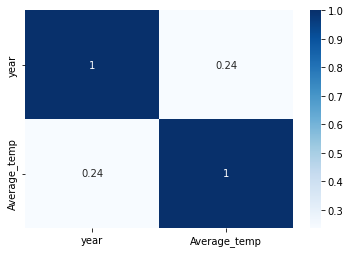

In [17]:
demo= demo[['year','Average_temp']]
sns.heatmap(demo.corr(),cmap='Blues', annot=True)
sns.set(rc={'figure.figsize':(10,10)})

<h1 style="font-size:3rem; color:orange;">Correlation Matrix</h1>

<h3 style=" color:blue;">A correlation matrix is simply a table which displays the correlation coefficients for different variables. 
The matrix depicts the correlation between all the possible pairs of values in a table. 
Here, we are going to find the pairwise correlation of all columns in the dataframe.
</h3>

In [18]:
cor=demo.corr()
cor

,year,Average_temp
year,1.000000,0.236765
Average_temp,0.236765,1.000000


<h1 style="font-size:3rem; color:orange;">Box plots</h1>

<p style="font-size:1.6rem; color:blue;">A boxplot is a standardized way of displaying the distribution of data based on a five number summary (“minimum”, first quartile [Q1], median, third quartile [Q3] and “maximum”). 
It can tell you about your outliers and what their values are.
The box plots shown below is for Confident_interval and Average_temp  </p>

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Average_temp'>

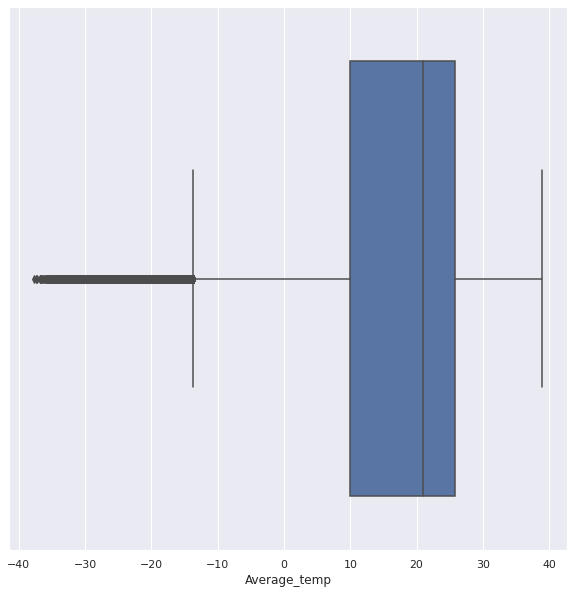

In [19]:
sns.boxplot(demo['Average_temp'])

# 

# Illustration of Feature Independence Plots using line plots

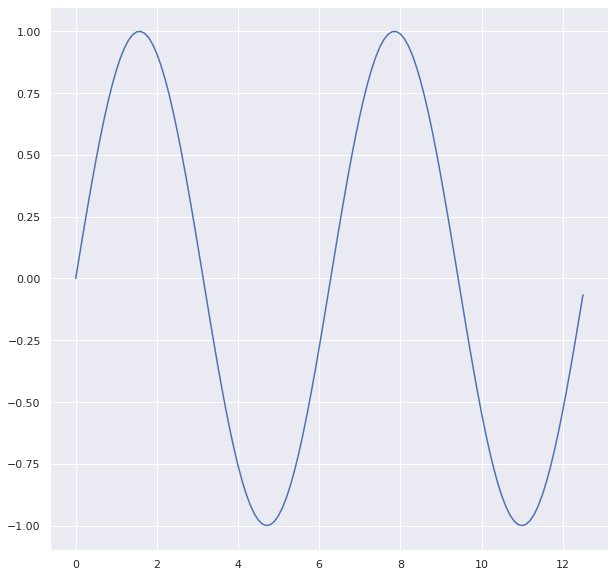

In [20]:
year = np.arange(0, 4 * np.pi, 0.1)
Average_temp = np.sin(year)
plt.plot(year, Average_temp)
plt.show()

<h1 style="font-size:3rem; color:orange;">Outlier Plots </h1>

<p style="font-size:1.7rem; color:blue;">An outlier is an observation that lies an abnormal distance from other values in the overall distrubibution of a dataset.
 </p>

# 1. Using Box Plot

1. # In the graph below, can also clearly see that values which are sccatered far from others are acting as the outliers and are above -14.

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Average_temp'>

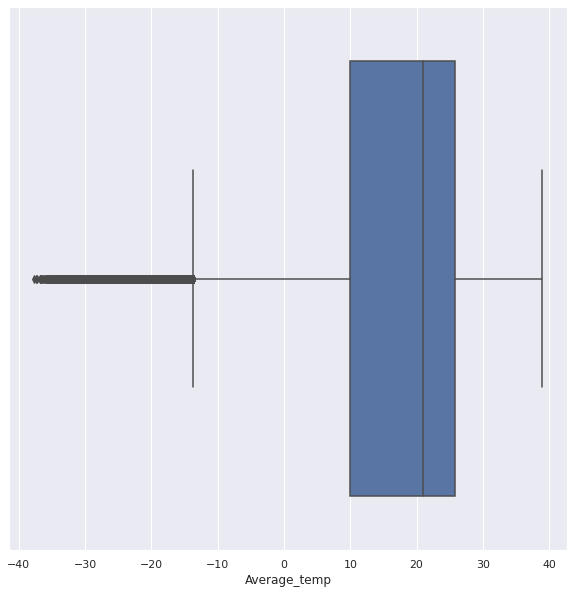

In [21]:
sns.boxplot(demo['Average_temp'])

In [22]:
demo.describe()

,year,Average_temp
count,544811.000000,544811.000000
mean,1913.145696,17.193354
std,64.346358,10.953966
min,1743.000000,-37.658000
25%,1869.000000,10.025000
50%,1919.000000,20.901000
75%,1966.000000,25.814000
max,2013.000000,38.842000


# Removing outliers

In [23]:
demo1= demo[demo['Average_temp']<-15]

<AxesSubplot:ylabel='Average_temp'>

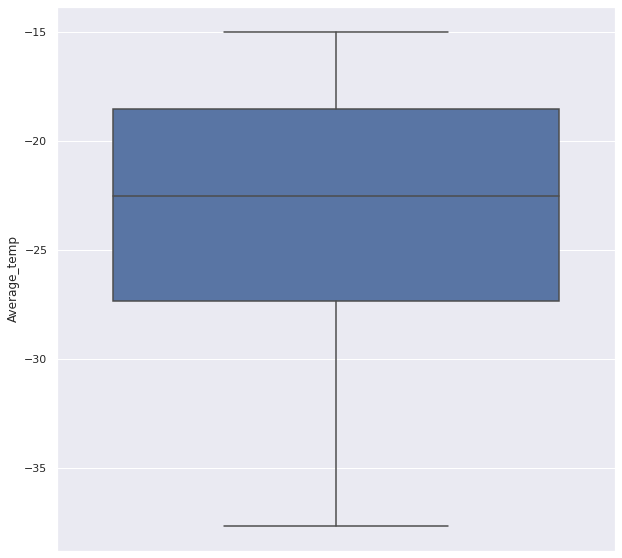

In [24]:
sns.boxplot(y='Average_temp', data=demo1)

In [25]:
demo1.describe()

,year,Average_temp
count,5731.000000,5731.000000
mean,1910.250567,-23.050083
std,59.177168,5.218649
min,1753.000000,-37.658000
25%,1862.000000,-27.335500
50%,1910.000000,-22.537000
75%,1961.000000,-18.553500
max,2013.000000,-15.008000


# Illustration of Patterns of Interest

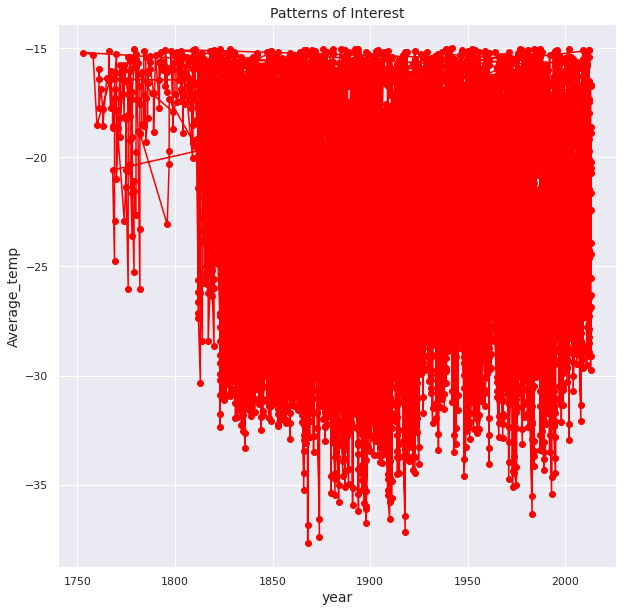

In [26]:
plt.plot(demo1['year'], demo1['Average_temp'], color='red', marker='o')
plt.title('Patterns of Interest', fontsize=14)
plt.xlabel('year', fontsize=14)
plt.ylabel('Average_temp', fontsize=14)
plt.grid(True)
plt.show()

<h1 style="font-size:3.5rem; color:orange;">Feature Independence Plots</h1>

**The illustration below shows how the dependent feature average temperature varies with the independent feature year.**

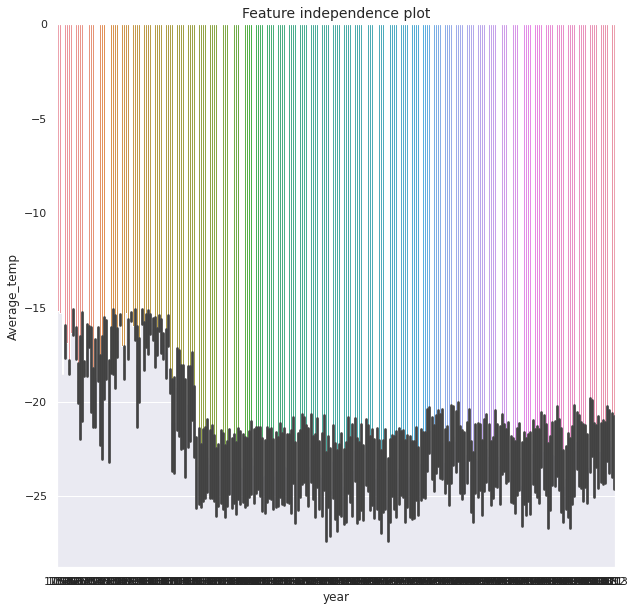

In [27]:
plt.title('Feature independence plot', fontsize=14)
sns.barplot(x = 'year',y = 'Average_temp',data = demo1)
plt.show()

<h1 style="font-size:3.5rem; color:orange;">Illustration of Trends in Time and Space</h1>

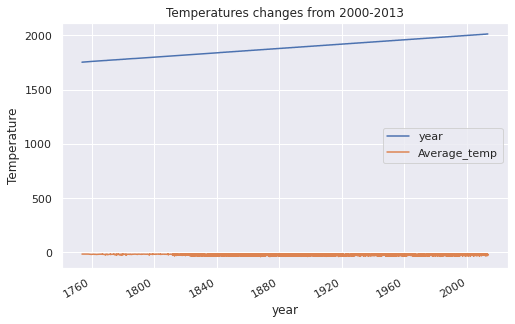

In [28]:
#demo1.plot(grid=True)
demo1.plot(title='Temperatures changes from 2000-2013', figsize=(8,5))
plt.ylabel('Temperature', fontsize=12)
plt.xlabel('year', fontsize=12)
plt.legend()

<h1 style="font-size:3.5rem; color:orange;">Split data into train, validation and test sets</h1>

In [29]:

from sklearn.model_selection import train_test_split

# Let's say we want to split the data in 80:10:10 for train:valid:test dataset

X = demo1.drop(columns = ['Average_temp']).copy()
y = demo1['Average_temp']

# In the first step we will split the data in training and remaining dataset
X_train, X_rem, y_train, y_rem = train_test_split(X,y, train_size=0.8)

# Now since we want the valid and test size to be equal (10% each of overall data). 
# we have to define valid_size=0.5 (that is 50% of remaining data)
test_size = 0.5
X_valid, X_test, y_valid, y_test = train_test_split(X_rem,y_rem,
                                                    random_state=1, test_size=0.5)

In [30]:
print('Train data'), print(X_train.shape), print(y_train.shape)
print('-----------------------------------------------------')
print('Test data'), print(X_valid.shape), print(y_valid.shape)
print('-----------------------------------------------------')
print('Valid data'),print(X_test.shape), print(y_test.shape)

Train data
(4584, 1)
(4584,)
-----------------------------------------------------
Test data
(573, 1)
(573,)
-----------------------------------------------------
Valid data
(574, 1)
(574,)


(None, None, None)

# Fitting a model

In [31]:
# importing models to compare
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.neural_network import MLPRegressor #multi layer perception..deep learning
from sklearn.ensemble import RandomForestRegressor

# Instantiate the models
modellR= LinearRegression() # default hyperparameters
modelNN= MLPRegressor()
modelRF= RandomForestRegressor()

In [32]:
# Training models
modellR.fit(X_train,y_train)
modelRF.fit(X_train,y_train) 
modelNN.fit(X_train,y_train)

MLPRegressor()

In [35]:
# Giving different r2 values for each model 
#which is coefficient of determination for 
#comparing models based on generalizability
print(modellR.score(X_test, y_test))
print(modelNN.score(X_test, y_test))
print(modelRF.score(X_test, y_test))

0.007386124400191818
0.011988475289441247
-0.014099717068397188


# Tune hyperparameters

<p style="font-size:1.7rem; color:blue;">In the part below, we have used datasets to load the inbuilt iris dataset and we have created objects X and y to store the data and the target value respectively.
 </p>


In [36]:
# checking distribution of target variable
demo1['Average_temp'].value_counts()

-21.991    4
-24.851    4
-28.044    4
-28.357    4
-17.111    4
          ..
-27.333    1
-30.713    1
-19.508    1
-20.625    1
-15.245    1
Name: Average_temp, Length: 4997, dtype: int64

In [37]:
X= demo1.drop(columns='Average_temp', axis=1)
y =demo1['Average_temp']

In [38]:
#convert y values to categorical values
lab = preprocessing.LabelEncoder()
y_transformed = lab.fit_transform(y)

In [39]:
print(X)

            year
Date            
1803-01-01  1803
1838-01-01  1838
1848-01-01  1848
1893-01-01  1893
1929-02-01  1929
...          ...
1930-01-01  1930
1933-01-01  1933
1934-01-01  1934
1935-01-01  1935
2008-01-01  2008

[5731 rows x 1 columns]


In [40]:
X= np.asarray(X)
y= np.asarray(y)

In [41]:
from sklearn.svm import  SVC
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
import sklearn.datasets

**GridSearchCV**

In [44]:
# loading the SVC model
model = SVC()

# hyperparameters

parameters = {
    'kernel' :['linear', 'poly', 'rbf', 'sigmoid'],
    'C' :[1,5,10,20]
}

In [ ]:
# grid search
classifier = GridSearchCV(model, parameters, cv=2)

# fitting the data to model
classifier.fit(X,y_transformed)

/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  UserWarning,


<h1 style="font-size:3.5rem; color:orange;">Evaluating the model</h1>

**We are going to use the following error metrics for evaluating and reporting the performance of a regression model**

* Mean Squared Error (MSE).
* Root Mean Squared Error (RMSE).
* Mean Absolute Error (MAE)
* Explain variance score (EVS)
* R2 score


In [45]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, explained_variance_score, r2_score
from sklearn.ensemble import RandomForestRegressor

# Instantiation of mosel
model = RandomForestRegressor(n_estimators=30, random_state=30)

**prediction on validation dataset**

In [49]:
# Fitting the model
LL_rf = model.fit(X_valid, y_valid)
print('The valid dataset')

#Traing the model evaluation
# The validation r_sq
print('The R2 score is : %.2f'% LL_rf.score(X_valid, y_valid))


# prediction on validation dataset
ytrain_pred = LL_rf.predict(X_valid)
#The MAE
print('The MAE is : %.2f'% mean_absolute_error(X_valid, ytrain_pred))

# the MSE
print('The MSE is : %.2f'% mean_squared_error(y_valid, ytrain_pred))

# The RMSE
print('The RMSE is : %.2f'% np.sqrt(mean_absolute_error(X_valid, ytrain_pred)))

# The EVS
print('The EVS is : %.2f'% explained_variance_score(y_valid, ytrain_pred))

print('------------------------------------------------------------------------')



# Fitting the model
LL_rf = model.fit(X_train,y_train)

print('The training dataset')
#Traing the model evaluation
# The training r_sq
print('The R2 score is : %.2f'% LL_rf.score(X_train,y_train))

# prediction on training dataset
ytrain_pred = LL_rf.predict(X_train)
#The MAE
print('The MAE is : %.2f'% mean_absolute_error(X_train, ytrain_pred))

# the MSE
print('The MSE is : %.2f'% mean_squared_error(y_train, ytrain_pred))

# The RMSE
print('The RMSE is : %.2f'% np.sqrt(mean_absolute_error(X_train, ytrain_pred)))

# The EVS
print('The EVS is : %.2f'% explained_variance_score(y_train, ytrain_pred))

print('------------------------------------------------------------------------')



# Fitting the model
LL_rf = model.fit(X_test, y_test)
print('The testing dataset')
#Traing the model evaluation
# The testing ing r_sq
print('The R2 score is : %.2f'% LL_rf.score(X_test, y_test))

# prediction on validation dataset
ytrain_pred = LL_rf.predict(X_test)
#The MAE
print('The MAE is : %.2f'% mean_absolute_error(X_test, ytrain_pred))

# the MSE
print('The MSE is : %.2f'% mean_squared_error(y_test, ytrain_pred))

# The RMSE
print('The RMSE is : %.2f'% np.sqrt(mean_absolute_error(X_test, ytrain_pred)))

# The EVS
print('The EVS is : %.2f'% explained_variance_score(y_test, ytrain_pred))



The valid dataset
The R2 score is : 0.37
The MAE is : 1933.23
The MSE is : 16.52
The RMSE is : 43.97
The EVS is : 0.37
------------------------------------------------------------------------
The training dataset
The R2 score is : 0.07
The MAE is : 1933.90
The MSE is : 25.62
The RMSE is : 43.98
The EVS is : 0.07
------------------------------------------------------------------------
The testing dataset
The R2 score is : 0.36
The MAE is : 1928.60
The MSE is : 17.12
The RMSE is : 43.92
The EVS is : 0.36
